In [1]:
!pip install scikit-learn==1.0.1

In [1]:
# Alwis Shaji
# COBA001

# Importing Necesarry Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore") 

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Loading Data
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Data Exploration
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000

<Axes: >

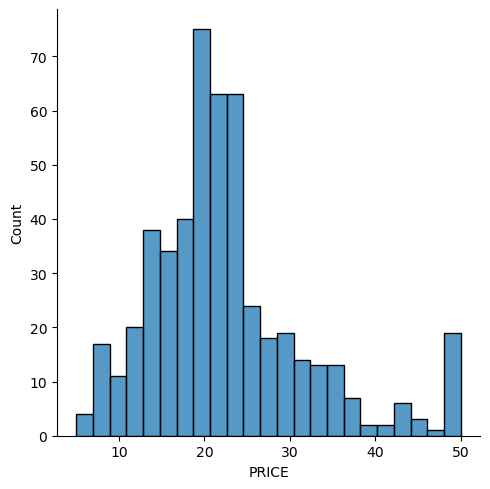

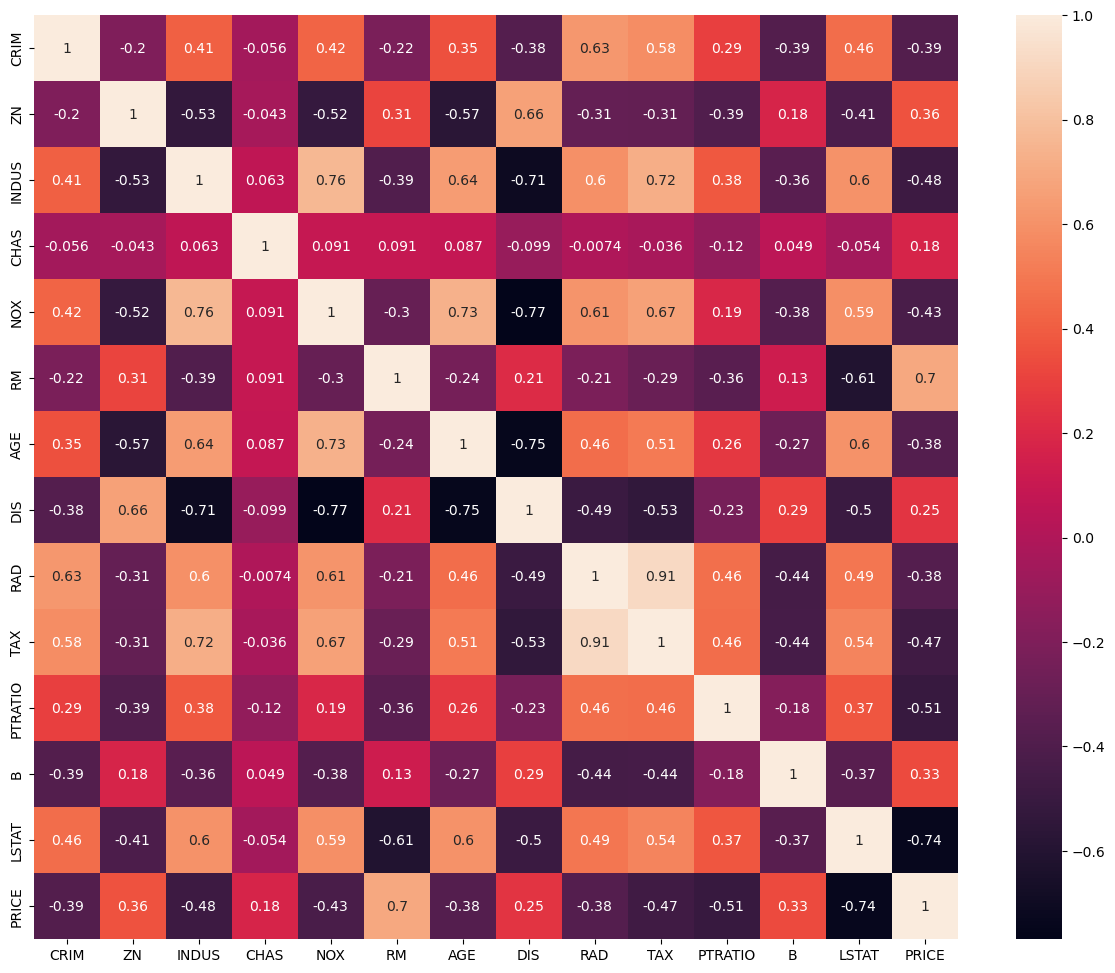

In [5]:
# Data Visualization
sns.displot(data.PRICE)

correlation = data.corr()
correlation.loc['PRICE']

fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

In [6]:
# Splitting Data into testing and training data
X = data.iloc[:,:-1]
y= data.PRICE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Model Building
model = Sequential()
model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fitting the data to the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 541.7489
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 428.4414
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 218.2269
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 86.1390
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 45.0691
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 27.9492
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 22.4034
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 20.4168
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 18.3748
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 17.1110
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 16.0843
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 15.4857
Epoch 13/100
13/13 [==

In [9]:
# Evaluating the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

4/4 [==============================] - 0s 4ms/step
R2 Score =  0.8906348781308231
RMSE Score =  3.1872937329224524
